In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

pro = pd.read_csv("/Volumes/data_files/UKB_data/processed_data/immune_pro.csv")
pro = pro.fillna(pro.median(numeric_only=True))

pro = pro[pro["fp-SLE"] > 0]
# pro = pro[((pro["fp-SLE"] > 0) & (pro["fp-SLE"] < 5)) | (pro["SLE"] == 0)]
# pro = pro[(pro["fp-SLE"] > 5)| (pro["SLE"] == 0)]

/var/folders/sy/n_c36kvx487143mhq4gvc7b40000gn/T/ipykernel_31984/280673536.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  pro = pd.read_csv("/Volumes/data_files/UKB_data/processed_data/immune_pro.csv")


In [2]:
pro["fp-SLE"]

0        14.442163
1        13.075975
2        13.631759
3        15.208761
4        15.301848
           ...    
53008    14.869268
53009    16.355921
53010    15.641342
53011    15.531828
53012    13.352498
Name: fp-SLE, Length: 52747, dtype: float64

Using pdcd1 to predict SLE
Using lgals9 to predict SLE
Using bst2 to predict SLE
Using scarb2 to predict SLE
Using cxcl16 to predict SLE
Using il15 to predict SLE
Using lag3 to predict SLE
Using trim21 to predict SLE
Using pomc to predict SLE
Using mepe to predict SLE
Using sod2 to predict SLE


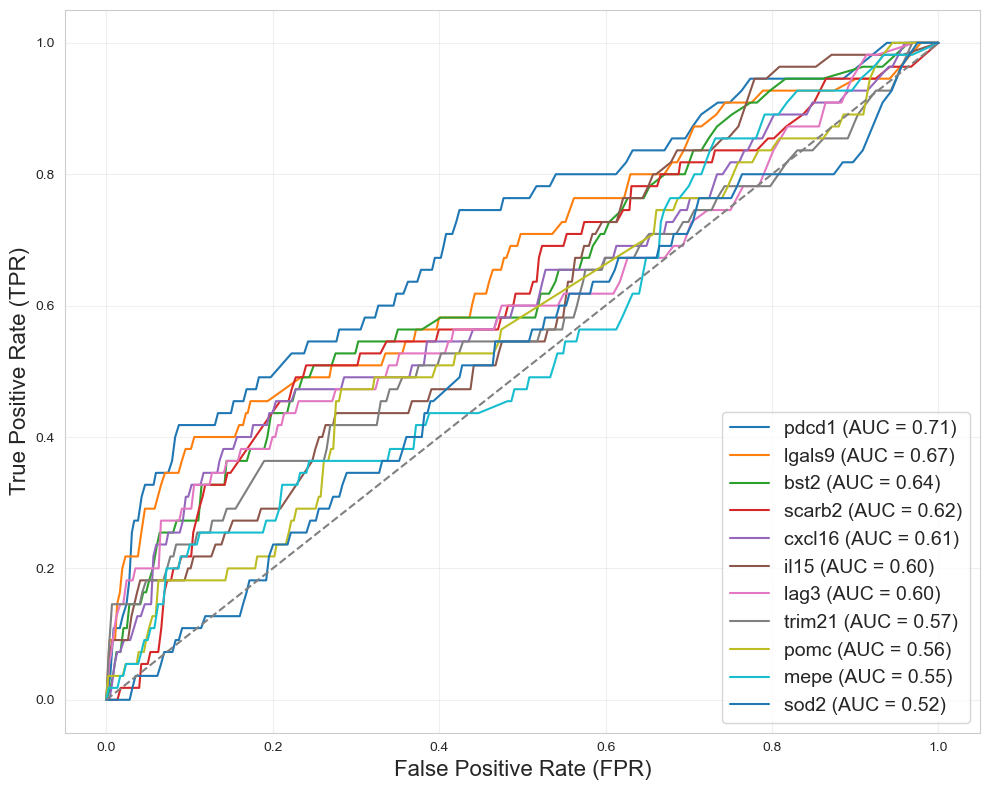

In [3]:
features = ['pdcd1','lgals9','bst2','scarb2','cxcl16','il15','lag3', 'trim21','pomc','mepe','sod2']
target = 'SLE'

plt.figure(figsize=(10, 8))

for feature in features:
    print(f"Using {feature} to predict {target}")
    X = pro[[feature]] 
    y = pro[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    params = {
        "objective": "binary",
        "boosting_type": "gbdt",
        "metric": "binary_logloss",
        "learning_rate": 0.05,
        "num_leaves": 31,
        "min_data_in_leaf": 20,
        "max_depth": -1,
        "feature_fraction": 0.8,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "verbose": -1,
    }

    model = lgb.train(params, train_data, valid_sets=[train_data, test_data])

    y_pred_proba = model.predict(X_test, num_iteration=model.best_iteration)

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f"{feature} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  
# plt.title("ROC Curves for Individual Protein Features Predicting SLE", fontsize=14)
plt.xlabel("False Positive Rate (FPR)", fontsize=16)
plt.ylabel("True Positive Rate (TPR)", fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

# plt.savefig("/Volumes/data_files/UKB_data/immune_result/km_curves_auc/single_protein_auc.pdf",dpi=300)
# plt.savefig("/Volumes/data_files/UKB_data/immune_result/km_curves_auc/single_protein_auc_5.pdf",dpi=300)
# plt.savefig("/Volumes/data_files/UKB_data/immune_result/km_curves_auc/single_protein_auc_5_10.pdf",dpi=300)
plt.show()

/var/folders/sy/n_c36kvx487143mhq4gvc7b40000gn/T/ipykernel_31984/561135195.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  pro = pd.read_csv("/Volumes/data_files/UKB_data/processed_data/immune_pro.csv")


Using pdcd1 + covariates to predict SLE
Using lgals9 + covariates to predict SLE
Using bst2 + covariates to predict SLE
Using scarb2 + covariates to predict SLE
Using cxcl16 + covariates to predict SLE
Using il15 + covariates to predict SLE
Using lag3 + covariates to predict SLE
Using trim21 + covariates to predict SLE
Using pomc + covariates to predict SLE
Using mepe + covariates to predict SLE
Using sod2 + covariates to predict SLE


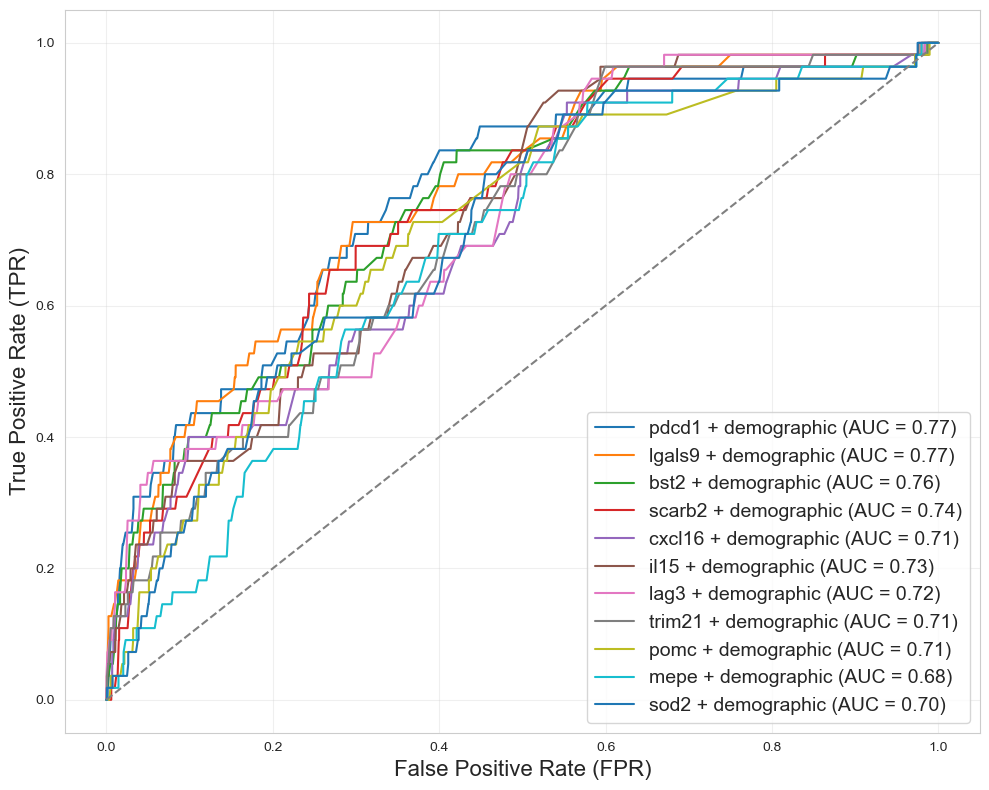

In [5]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

pro = pd.read_csv("/Volumes/data_files/UKB_data/processed_data/immune_pro.csv")
pro = pro.fillna(pro.median(numeric_only=True))

pro = pro[pro["fp-SLE"] > 0]

# pro = pro[((pro["fp-SLE"] > 0) & (pro["fp-SLE"] < 5)) | (pro["SLE"] == 0)]

# pro = pro[(pro["fp-SLE"] > 5)| (pro["SLE"] == 0)]

features = ['pdcd1','lgals9','bst2','scarb2','cxcl16','il15','lag3', 'trim21','pomc','mepe','sod2']
covariates = ['sex', 'ethnicity']  
target = 'SLE'

plt.figure(figsize=(10, 8))

for feature in features:
    print(f"Using {feature} + covariates to predict {target}")

    X = pro[[feature] + covariates]  
    y = pro[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    params = {
        "objective": "binary",
        "boosting_type": "gbdt",
        "metric": "binary_logloss",
        "learning_rate": 0.05,
        "num_leaves": 31,
        "min_data_in_leaf": 20,
        "max_depth": -1,
        "feature_fraction": 0.8,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "verbose": -1,
    }

    model = lgb.train(params, train_data, valid_sets=[train_data, test_data])

    y_pred_proba = model.predict(X_test, num_iteration=model.best_iteration)

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f"{feature} + demographic (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  
# plt.title("ROC Curves for Protein Features + demographic Predicting SLE", fontsize=14)
plt.xlabel("False Positive Rate (FPR)", fontsize=16)
plt.ylabel("True Positive Rate (TPR)", fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

# plt.savefig("/Volumes/data_files/UKB_data/immune_result/km_curves_auc/protein_demographic_auc_5_10.pdf",dpi=300)
plt.show()